# My Project 1

# Problem Statement

We are consultants for the US Department of Education tasked with the objective of deciding the best use of a new taxpayer-funded grant to help increase enrollment in colleges in the United States. The grant is aimed at subsidising standardised tests widely used in the United States for college admissions with the aim of supporting underfunded and lower participating states

TBC


### To further edit this project

1. Change of the items below to tasks in order to organise them properly

2. Usage of matplotlib instead of seaborn for some of the more basic plots

3. Include a section on statistics of the data to get a better feel of it


## Step 1: Importing of the related libraries


In [1]:
### Importing of the libraries needed
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly_express as px
import seaborn as sns

%matplotlib inline

## Task ##: Additional items **skip** for now


In [3]:
# from urllib.request import urlopen
# url = "https://www2.census.gov/geo/docs/reference/state.txt"
# text = urlopen(url).read()
# # print(text)

# state_ab = pd.read_csv(url, sep='|')
# state_ab.head()
# state_abb = pd.Dataframe
# state_ab.head()
# act_2017.head()
### Task 3.1: Merging of state_ab files into all files

# act_2017 = pd.merge(
#     left= act_2017,
#     right= state_ab,
#     how='left',
#     left_on='State',
#     right_on='name'
# )

# act_2017.head()

# # act_2018 = pd.merge(
# #     left= act_2018,
# #     right= state_ab,
# #     how='inner',
# #     left_on='State',
# #     right_on='name'
# # )

# # act_2018

In [7]:
# act_2017.head()

In [8]:
# states.to_file("path_to_GeoJSON _file", driver = "GeoJSON")
# with open("path_to_GeoJSON _file") as geofile:
#     state_j_file = json.load(geofile)

In [9]:
# state_j_file["features"][0]

In [10]:
# fig = px.choropleth(df,
#                     locations='state_code',
#                     locationmode="USA-states",
#                     scope="usa",
#                     color='Median Sales Price ($)',
#                     color_continuous_scale="Viridis_r",

#                     )
# fig.show()

## Step 2: Data Pre-processing of act data


### Step 2.1: Reading of files:

1. ACT_2017
2. ACT_2018
3. ACT_2019


In [23]:
#  Opening of related data files
act_2017 = pd.read_csv("data/act_2017.csv")
act_2018 = pd.read_csv("data/act_2018.csv")
act_2019 = pd.read_csv("data/act_2019.csv")

Interpretation of all ACT data


In [24]:
print("act_2017")
display(act_2017.head())

print("act_2018")
display(act_2018.head())

print("act_2019")
display(act_2019.head())

act_2017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


act_2018


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


act_2019


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [25]:
print("act_2017")
display(act_2017.info())

print("act_2018")
display(act_2018.info())

print("act_2019")
display(act_2019.info())

act_2017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


None

act_2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

act_2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

Initial Thoughts

- After looking through the data for ACT, it was found that only act_2017 contains additional columns for English, Math, Reading and Science

<br>

- The below shows the interpretation of the data given.

**Table interpretation**

| ACT 2017 Info | Description                                               |
| ------------- | --------------------------------------------------------- |
| No. of rows   | 52                                                        |
| State         | Name of State                                             |
| Participation | Participation rate in %                                   |
| English       | Average score for English                                 |
| Math          | Average score for Math                                    |
| Reading       | Average score for Reading                                 |
| Science       | Average score for Science                                 |
| Composite     | Total average score of English, Math, Reading and Science |

<br>

| ACT 2018 Info | Description                                               |
| ------------- | --------------------------------------------------------- |
| No. of rows   | 52                                                        |
| State         | Name of State                                             |
| Participation | Participation rate in %                                   |
| Composite     | Total average score of English, Math, Reading and Science |

<br>

| ACT 2019 Info | Description                                               |
| ------------- | --------------------------------------------------------- |
| No. of rows   | 52                                                        |
| State         | Name of State                                             |
| Participation | Participation rate in %                                   |
| Composite     | Total average score of English, Math, Reading and Science |

<br>

- As seen above, the ACT 2018 & ACT 2019 data does not have the
  - English
  - Math
  - Reading
  - Science

<br>

- As a result, the data for those information were searched externally from the following links, and downloaded: - [ACT 2018 Additional Data](https://nces.ed.gov/programs/digest/d18/tables/dt18_226.60.asp) - [ACT 2019 Additional Data](https://nces.ed.gov/programs/digest/d19/tables/dt19_226.60.asp)
  <br>

<br>

- Additional References
  - [ACT Test Scores: Understanding Your Scores](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)


### Step 2.2: Pre-processing of act_2017 data


- Display of act_2017 data


In [26]:
# Taking a look at the data
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [27]:
# Taking a look at the data
act_2017.info()

act_2017.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


- Checking for null values in data


In [28]:
# Checking for null values
act_2017.isnull().sum().sort_values().reset_index()

# No null values found

,index,0
0,State,0
1,Participation,0
2,English,0
3,Math,0
4,Reading,0
5,Science,0
6,Composite,0


- The 'State' column will be the main identifier among all the datasets - hence, the 'State' must be unique.

- Reformating of State column to title_case
- Checking for duplicates of the State column


In [29]:
# Reformating of the state to a titlecase
act_2017["State"] = act_2017["State"].str.title()

# Checking of duplicates in state
# Using the 'State' as the unique values
act_2017.loc[act_2017["State"].duplicated() == True]
# No duplicates found

,State,Participation,English,Math,Reading,Science,Composite


In [30]:
act_2017["State"].head()

0    National
1     Alabama
2      Alaska
3     Arizona
4    Arkansas
Name: State, dtype: object

- Reformating of Participation column to a float datatype in percentage


In [31]:
# Reformatting of the object in 'Participation" into a float percentage from range 0 - 1
act_2017["Participation"] = act_2017["Participation"].str.rstrip("%").astype("int")

In [32]:
# Checking of data
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int32  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), int32(1), object(2)
memory usage: 2.8+ KB


- Reformating of Composite column to a float datatype


In [33]:
# Found Composite column to be an object when it is supposed to be float64.
# Changing of Composite column datatype to float64

# pd.to_numeric(act_2017['Composite'])

# -- ValueError: Unable to parse string "20.2x" at position 51

act_2017[act_2017["Composite"] == "20.2x"]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [34]:
# Removal of the 'x'
act_2017.loc[act_2017["Composite"] == "20.2x", ["Composite"]] = 20.2

# Casting the entire column to float - no error encountered this time
act_2017["Composite"] = act_2017["Composite"].astype(float)

- Further exploration of the data


In [35]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.040385,21.509615
std,31.832518,2.332132,1.963602,2.048672,3.151113,2.002083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,22.525000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


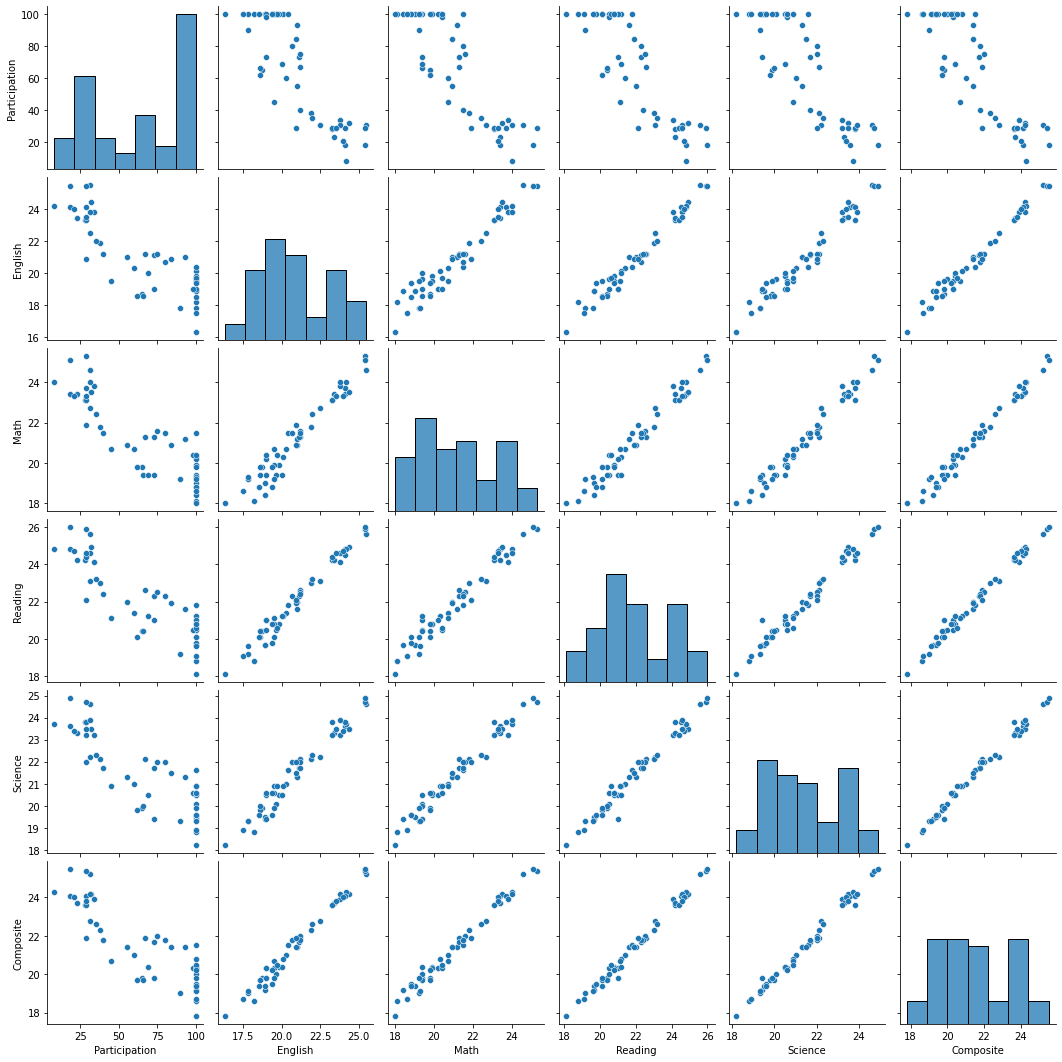

In [176]:
# General visualization

sns.pairplot(act_2017)

plt.show();

- Found a suspected outlier in the Science column
- A min score of 2.3 found at Science column


In [37]:
# Found a low score for 'Science' = 2.3

act_2017.groupby("State")["Science"].agg(np.sum).sort_values().reset_index().head()

,State,Science
0,Maryland,2.3
1,Nevada,18.2
2,Mississippi,18.8
3,South Carolina,18.9
4,North Carolina,19.3


- Editing of the science score for Maryland


In [38]:
# From the additional data sources - the composite is the average of the four test scores

# Recalculation of 'Science' score for Maryland

act_2017.loc[act_2017["State"] == "Maryland", "Science"] = 23.6 * 4 - (
    23.3 + 23.1 + 24.2
)

act_2017.loc[act_2017["State"] == "Maryland"]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28,23.3,23.1,24.2,23.8,23.6


In [39]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.453846,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.737303,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [40]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int32  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int32(1), object(1)
memory usage: 2.8+ KB


In [41]:
# # To rename the columns

# act_2017 = act_2017.rename(
#     columns={
#         "Participation": "Participation 2017",
#         "English": "English 2017",
#         "Math": "Math 2017",
#         "Reading": "Reading 2017",
#         "Science": "Science 2017",
#         "Composite": "Composite 2017",
#     }
# )

In [42]:
# Additional column for the year

act_2017["Year"] = "2017"

act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,60,20.3,20.7,21.4,21.0,21.0,2017
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,2017
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,2017
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,2017
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,2017


In [43]:
# sns.pairplot(act_2017)

### Step 2.3: Pre-processing of act_2018 data

**NOTE**: Most of the pre-processing steps for ACT_2017 will be repeated for ACT_2018 and ACT_2019.


In [50]:
act_2018 = pd.read_csv("data/act_2018.csv")

In [51]:
# Taking a look at the data
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [52]:
# Taking a look at the data
act_2018.info()

act_2018.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


- Checking for null values in data


In [53]:
# Checking for null values
act_2018.isnull().sum().reset_index()
# No null values found

,index,0
0,State,0
1,Participation,0
2,Composite,0


- Reformating of State column to titlecase
- Checking for duplicates of the State column


In [54]:
# Reformating the state to a titlecase
act_2018["State"] = act_2018["State"].str.title()

# Checking of duplicates in state
# Using the 'State' as the unique values
act_2018.loc[act_2018["State"].duplicated() == True]
# Duplicate found at Maine, index 20

,State,Participation,Composite
20,Maine,7%,24.0


In [55]:
# Found 2 counts for Maine
act_2018[act_2018["State"] == "Maine"]

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


- Removal of duplicate due to being the same data row


In [56]:
# Since both rows displays the same data, the duplicated row will be removed.

act_2018 = act_2018.drop_duplicates(subset="State")

In [57]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


- Reformating of Participation column to a float datetype in percentage


In [58]:
# Reformatting of the object in 'Participation" into a float percentage
act_2018["Participation"] = act_2018["Participation"].str.rstrip("%").astype("int")

- Due to the removal of the duplicate, the number of rows has been reduced by 1.


In [59]:
print(len(act_2017["State"]))  # 52 rows

print(len(act_2018["State"]))  # 51 rows

52
51


- General visualization of the act 2018 data

In [60]:
# Using a for loop to loop every state to check which state is missing in ACT_2018
for state in act_2017["State"].values:
    if state not in act_2018["State"].values:
        print(state)

National


In [61]:
# Found that the missing state is "National"
# Additional check for the "National" row

act_2018[act_2018["State"].str.contains("National") == True]
# No "National" value found

,State,Participation,Composite


- Creation of "National" row for ACT_2018

<Figure size 720x720 with 0 Axes>

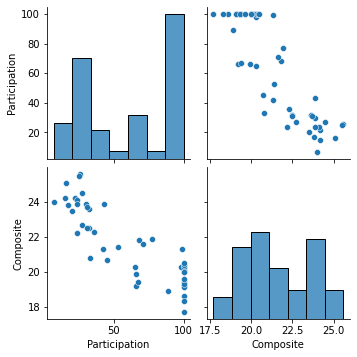

In [62]:
# Before the creation of "National" row - to check if any outliers are found

plt.figure(figsize=(10, 10))
sns.pairplot(act_2018)

plt.show()

# No low scores/outliers suspected - to proceed with the addition of 'National' row

In [63]:
# Creation of new row with 'National' data
new_row = pd.DataFrame(
    data=[
        [
            "National",
            np.round(act_2018["Participation"].mean(), 2),
            np.round(act_2018["Composite"].mean(), 2),
        ]
    ],
    columns=["State", "Participation", "Composite"],
)

# Addition of 'National" data row into the top row of 2018 data
act_2018 = pd.concat([new_row, act_2018], axis=0, ignore_index=True)

act_2018[act_2018["State"] == "National"]

,State,Participation,Composite
0,National,61.73,21.5


In [64]:
act_2018.head()
# "National" value added into the data

,State,Participation,Composite
0,National,61.73,21.5
1,Alabama,100.00,19.1
2,Alaska,33.00,20.8
3,Arizona,66.00,19.2
4,Arkansas,100.00,19.4


In [65]:
# Change the columns name to add in the year

act_2018.head()

,State,Participation,Composite
0,National,61.73,21.5
1,Alabama,100.00,19.1
2,Alaska,33.00,20.8
3,Arizona,66.00,19.2
4,Arkansas,100.00,19.4


- Further exploration of the data


In [66]:
act_2018.describe()

,Participation,Composite
count,52.000000,52.000000
mean,61.725577,21.496154
std,33.701736,2.090779
min,7.000000,17.700000
25%,29.250000,19.975000
50%,65.500000,21.300000
75%,100.000000,23.625000
max,100.000000,25.600000


### Task 2.4: Addition of external dataset for ACT_2018


Additonal of information into act_2018 dataset for:

- English
- Math
- Reading
- Science


- Display of external act 2018 data


In [68]:
# ffill - to deal with merge cells
ext_2018 = pd.read_excel("data/additional_data/ACT_2018_data.xls").fillna(
    method="ffill", axis=1
)

ext_2018.head(10)

,"Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2014 and 2018",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,State,2014,2014,2014,2014,2014,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
1,NaN,NaN,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores
2,NaN,Composite score,English score,Mathematics score,Reading score,Science score,Composite score,English score,Mathematics score,Reading score,Science score,2014,2018.0
3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
4,United States .............,21,20.3,20.9,21.3,20.8,20.8,20.2,20.5,21.3,20.7,53.040923,52.143592
5,Alabama .......................,20.6,20.7,19.5,21.3,20.4,19.1,18.9,18.3,19.6,19,80,100.0
6,Alaska ........................,21,19.9,21.1,21.6,20.8,20.8,19.8,20.6,21.6,20.7,37,33.0
7,Arizona ......................,19.7,18.8,20.2,20,19.5,19.2,18.2,19.4,19.5,19.2,55,66.0
8,Arkansas ......................,20.4,20.1,19.9,20.8,20.3,19.4,19.1,18.9,19.7,19.4,93,100.0
9,California ....................,22.3,21.8,22.8,22.3,21.7,22.7,22.5,22.5,23,22.1,29,27.0


In [177]:
# Check for NaN values
ext_2018.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,State,0
1,Composite 2018,0
2,English 2018,0
3,Math 2018,0
4,Reading 2018,0
5,Science 2018,0
6,Participation 2018,0


- Tidying of ext act 2018 data


In [70]:
# Changing of the second row to be the header

ext_2018.columns = ext_2018.iloc[0]

ext_2018.head()

,State,2014,2014,2014,2014,2014,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
0,State,2014,2014,2014,2014,2014,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
1,NaN,NaN,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores
2,NaN,Composite score,English score,Mathematics score,Reading score,Science score,Composite score,English score,Mathematics score,Reading score,Science score,2014,2018.0
3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
4,United States .............,21,20.3,20.9,21.3,20.8,20.8,20.2,20.5,21.3,20.7,53.040923,52.143592


In [71]:
# Removal of row at index 0 - which was made the header
# Removal of row at index 1 - seems to be a merged row for 'Subject-area scores'
ext_2018 = ext_2018.drop(ext_2018.index[0:2]).reset_index(drop=True)
ext_2018.head()

,State,2014,2014,2014,2014,2014,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
0,NaN,Composite score,English score,Mathematics score,Reading score,Science score,Composite score,English score,Mathematics score,Reading score,Science score,2014,2018.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
2,United States .............,21,20.3,20.9,21.3,20.8,20.8,20.2,20.5,21.3,20.7,53.040923,52.143592
3,Alabama .......................,20.6,20.7,19.5,21.3,20.4,19.1,18.9,18.3,19.6,19,80,100.0
4,Alaska ........................,21,19.9,21.1,21.6,20.8,20.8,19.8,20.6,21.6,20.7,37,33.0


In [72]:
ext_2018.columns

Index([                'State',                    2014,
                          2014,                    2014,
                          2014,                    2014,
                          2018,                    2018,
                          2018,                    2018,
                          2018, 'Percent taking ACT\1\',
       'Percent taking ACT\1\'],
      dtype='object', name=0)

In [73]:
# Convert columns headers to string - error encounter earlier when trying to drop columns header = '2014'
ext_2018.columns = ext_2018.columns.astype(str)
ext_2018.rename(columns=lambda x: x.strip())  # Removal of whitespace in headers
ext_2018.columns

Index(['State', '2014', '2014', '2014', '2014', '2014', '2018', '2018', '2018',
       '2018', '2018', 'Percent taking ACT\1\', 'Percent taking ACT\1\'],
      dtype='object', name=0)

In [74]:
# Removal of the 2014 data - not used
ext_2018 = ext_2018.drop(columns=["2014"])

In [75]:
# Checking of data + checking tail
ext_2018.tail()

,State,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
61,Wisconsin .....................,20.5,19.8,20.3,20.6,20.8,73,100.0
62,Wyoming .................,20,19,19.7,20.6,20.3,100,100.0
63,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...,\1\Members of the graduating class who had tak...
64,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...,NOTE: The minimum score on the ACT is 1 and th...
65,"SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care...","SOURCE: ACT, The Condition of College and Care..."


In [76]:
# Removal of the bottom 3 rows - all text no data found

ext_2018 = ext_2018.drop(index=(ext_2018.index[63:66]), axis=0)

# ext_2018.tail()

In [77]:
# Removal of the "......"
ext_2018["State"] = ext_2018["State"].str.replace(r"[.]{2,}", "", regex=True)
# Removal of any whitespace
ext_2018["State"] = ext_2018["State"].str.strip()
# Changing each State to titlecase
ext_2018["State"] = ext_2018["State"].str.title()

ext_2018.head()

,State,2018,2018,2018,2018,2018,Percent taking ACT\1\,Percent taking ACT\1\
0,NaN,Composite score,English score,Mathematics score,Reading score,Science score,2014,2018.0
1,NaN,7.0,8.0,9.0,10.0,11.0,12.0,13.0
2,United States,20.8,20.2,20.5,21.3,20.7,53.040923,52.143592
3,Alabama,19.1,18.9,18.3,19.6,19,80,100.0
4,Alaska,20.8,19.8,20.6,21.6,20.7,37,33.0


In [78]:
ext_2018.columns

Index(['State', '2018', '2018', '2018', '2018', '2018',
       'Percent taking ACT\1\', 'Percent taking ACT\1\'],
      dtype='object', name=0)

In [79]:
# Renaming the columns

ext_2018.columns = [
    "State",
    "Composite 2018",
    "English 2018",
    "Math 2018",
    "Reading 2018",
    "Science 2018",
    "Participation 2014",
    "Participation 2018",
]

ext_2018.head()

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2014,Participation 2018
0,NaN,Composite score,English score,Mathematics score,Reading score,Science score,2014,2018.0
1,NaN,7.0,8.0,9.0,10.0,11.0,12.0,13.0
2,United States,20.8,20.2,20.5,21.3,20.7,53.040923,52.143592
3,Alabama,19.1,18.9,18.3,19.6,19,80,100.0
4,Alaska,20.8,19.8,20.6,21.6,20.7,37,33.0


In [80]:
# Removal of first 2 rows at index 0 and 1
ext_2018 = ext_2018.drop(index=(ext_2018.index[0:2]), axis=0).reset_index(drop=True)


# Removal of Participation 2014 column
ext_2018 = ext_2018.drop(columns=["Participation 2014"])

ext_2018.head()

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018
0,United States,20.8,20.2,20.5,21.3,20.7,52.143592
1,Alabama,19.1,18.9,18.3,19.6,19,100.0
2,Alaska,20.8,19.8,20.6,21.6,20.7,33.0
3,Arizona,19.2,18.2,19.4,19.5,19.2,66.0
4,Arkansas,19.4,19.1,18.9,19.7,19.4,100.0


- Reformatting of ext act 2018 data


In [81]:
ext_2018.isnull().sum().sort_values().reset_index()

,index,0
0,State,9
1,Composite 2018,9
2,English 2018,9
3,Math 2018,9
4,Reading 2018,9
5,Science 2018,9
6,Participation 2018,9


In [82]:
ext_2018[ext_2018["State"].isnull() == True]

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
ext_2018[ext_2018["State"].isnull() == True]  # all NaN rows are all Nan values

ext_2018 = ext_2018.dropna(axis=0).reset_index(drop=True)

ext_2018[ext_2018["State"].isnull() == True]  # remove all NaN rows

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018


In [84]:
ext_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               52 non-null     object
 1   Composite 2018      52 non-null     object
 2   English 2018        52 non-null     object
 3   Math 2018           52 non-null     object
 4   Reading 2018        52 non-null     object
 5   Science 2018        52 non-null     object
 6   Participation 2018  52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [85]:
ext_2018.head()

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018
0,United States,20.8,20.2,20.5,21.3,20.7,52.143592
1,Alabama,19.1,18.9,18.3,19.6,19,100.0
2,Alaska,20.8,19.8,20.6,21.6,20.7,33.0
3,Arizona,19.2,18.2,19.4,19.5,19.2,66.0
4,Arkansas,19.4,19.1,18.9,19.7,19.4,100.0


In [86]:
act_2018['State'].equals(act_2017['State'])

True

In [87]:
# Using a for loop to loop every state to check which state is missing in ext_2018
for state in act_2018["State"].values:
    if state not in ext_2018["State"].values:
        print(state)

National


In [88]:
# Change of the United States to National
ext_2018["State"][0] = "National"

# ext_2018.head()

In [89]:
# Merging of the data
act_2018_new = pd.merge(left=act_2018, right=ext_2018, on="State", how="left")

act_2018_new.head()

,State,Participation,Composite,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018
0,National,61.73,21.5,20.8,20.2,20.5,21.3,20.7,52.143592
1,Alabama,100.00,19.1,19.1,18.9,18.3,19.6,19,100.0
2,Alaska,33.00,20.8,20.8,19.8,20.6,21.6,20.7,33.0
3,Arizona,66.00,19.2,19.2,18.2,19.4,19.5,19.2,66.0
4,Arkansas,100.00,19.4,19.4,19.1,18.9,19.7,19.4,100.0


In [90]:
# Creation of 2 new columns to check if the values in the participation and composite columns are the same
def f(x):
    return "yes" if x["Participation"] == x["Participation 2018"] else "no"


act_2018_new["compare_part"] = act_2018_new.apply(f, axis=1)


def f(x):
    return "yes" if x["Composite"] == x["Composite 2018"] else "no"


act_2018_new["compare_com"] = act_2018_new.apply(f, axis=1)

In [91]:
# Comparison of participation and participation ext 2018
display(act_2018_new[act_2018_new["compare_part"] == "no"])

# Comparison of composite and composite ext 2018
display(act_2018_new[act_2018_new["compare_com"] == "no"])

,State,Participation,Composite,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018,compare_part,compare_com
0,National,61.73,21.5,20.8,20.2,20.5,21.3,20.7,52.143592,no,no
44,Texas,45.00,20.7,20.6,19.6,20.6,21.1,20.8,41.0,no,no


,State,Participation,Composite,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018,compare_part,compare_com
0,National,61.73,21.5,20.8,20.2,20.5,21.3,20.7,52.143592,no,no
23,Michigan,22.00,24.2,24.4,24.5,23.9,24.7,23.9,22.0,yes,no
44,Texas,45.00,20.7,20.6,19.6,20.6,21.1,20.8,41.0,no,no


In [92]:
# Taking the external data found to be from the National Center for Education Statistics
# Determined to follow the data from the external data
# The original data in 'Participation' and 'Composite' will be dropped

act_2018_new = act_2018_new.drop(
    ["Participation", "Composite", "compare_part", "compare_com"], axis=1
)

# Changing the format to floats
act_2018_new = act_2018_new.apply(pd.to_numeric, errors="ignore").round(1)

act_2018_new.head()

,State,Composite 2018,English 2018,Math 2018,Reading 2018,Science 2018,Participation 2018
0,National,20.8,20.2,20.5,21.3,20.7,52.1
1,Alabama,19.1,18.9,18.3,19.6,19.0,100.0
2,Alaska,20.8,19.8,20.6,21.6,20.7,33.0
3,Arizona,19.2,18.2,19.4,19.5,19.2,66.0
4,Arkansas,19.4,19.1,18.9,19.7,19.4,100.0


In [93]:
# To reorder the columns
act_2018_new.columns.tolist()

['State',
 'Composite 2018',
 'English 2018',
 'Math 2018',
 'Reading 2018',
 'Science 2018',
 'Participation 2018']

In [94]:
# To reorder the columns
new_cols = [
    "State",
    "Participation 2018",
    "English 2018",
    "Math 2018",
    "Reading 2018",
    "Science 2018",
    "Composite 2018",
]

act_2018_new = act_2018_new[new_cols]


# Renaming of the columns
act_2018_new = act_2018_new.rename(
    columns={
        "Participation 2018": "Participation",
        "English 2018": "English",
        "Math 2018": "Math",
        "Reading 2018": "Reading",
        "Science 2018": "Science",
        "Composite 2018": "Composite",
    }
)

# Addition of the year 2018 column
act_2018_new["Year"] = "2018"

act_2018_new.head()

,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,52.1,20.2,20.5,21.3,20.7,20.8,2018
1,Alabama,100.0,18.9,18.3,19.6,19.0,19.1,2018
2,Alaska,33.0,19.8,20.6,21.6,20.7,20.8,2018
3,Arizona,66.0,18.2,19.4,19.5,19.2,19.2,2018
4,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4,2018


- General visualization of new 2018 data

<Figure size 720x720 with 0 Axes>

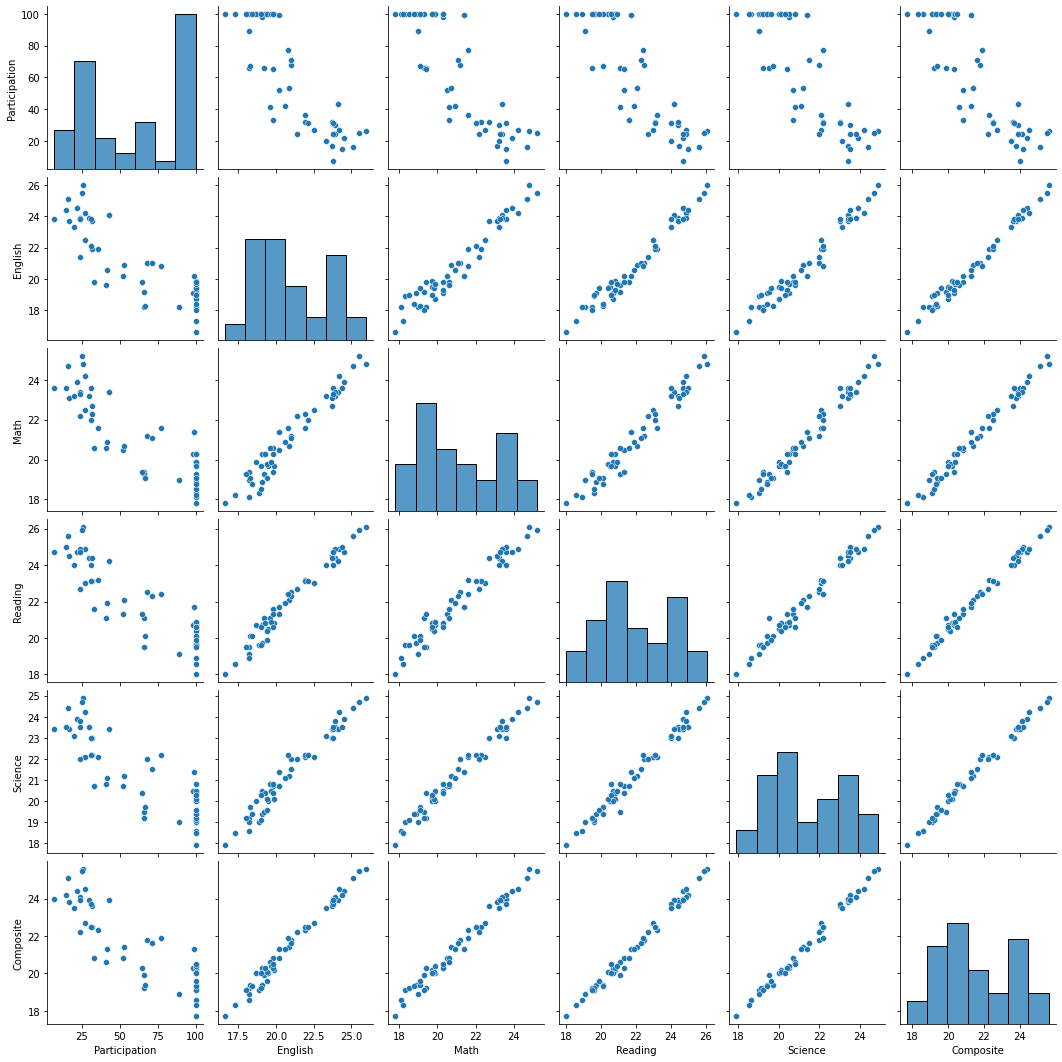

In [95]:
plt.figure(figsize=(10, 10))
sns.pairplot(act_2018_new)

plt.show();

### Step 2.5: Pre-processing of act_2019 data


In [97]:
# Reading of the data
act_2019 = pd.read_csv("data/act_2019.csv")
# Taking a look at the data
act_2019.info()

act_2019.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


- Checking for null values in data


In [98]:
# Checking for null values
act_2019.isnull().sum().sort_values().reset_index().head()
# No null values found

,index,0
0,State,0
1,Participation,0
2,Composite,0


- Reformating of State column to titlecase
- Checking for duplicates of the State column


In [99]:
# Reformating the state to a titlecase
act_2019["State"] = act_2019["State"].str.title()

# Checking of duplicates in state
# Using the 'State' as the unique values
act_2019.loc[act_2019["State"].duplicated() == True]
# No duplicates found

,State,Participation,Composite


In [100]:
# Using a for loop to loop every state to check that the state is in ACT_2019
for state in act_2017["State"].values:
    if state not in act_2019["State"].values:
        print(state)

# No state missing in ACT_2019

In [101]:
# Additional Check for "National" row
act_2019[act_2019["State"].str.contains("National") == True]
# "National" value found

,State,Participation,Composite
51,National,52%,20.7


In [102]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


- Reformating of Participation column to a float datetype in percentage


In [103]:
# Reformatting of the object in 'Participation" into a float percentage from range 0 - 1
act_2019["Participation"] = act_2019["Participation"].str.rstrip("%").astype("int")

In [104]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int32  
 2   Composite      52 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ KB


- To put the "National" state at the top of the table


In [105]:
# Obtain the index of target row = 51
act_2019.index[act_2019["State"] == "National"]

target_row = 51
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(act_2019)) if i != target_row]

act_2019 = act_2019.iloc[idx].reset_index(drop=True)

act_2019.head()

,State,Participation,Composite
0,National,52,20.7
1,Alabama,100,18.9
2,Alaska,38,20.1
3,Arizona,73,19.0
4,Arkansas,100,19.3


In [106]:
act_2019.info()

act_2019.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int32  
 2   Composite      52 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ KB


,Participation,Composite
count,52.000000,52.000000
mean,58.538462,21.450000
std,34.188326,2.175487
min,6.000000,17.900000
25%,24.750000,19.800000
50%,53.000000,20.950000
75%,100.000000,23.650000
max,100.000000,25.500000


- General visualization of act 2019 data

<Figure size 720x720 with 0 Axes>

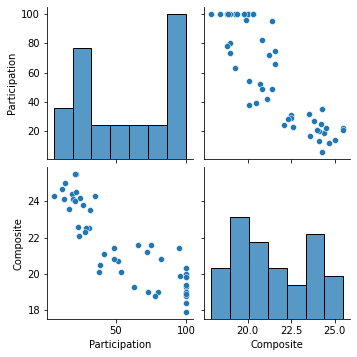

In [107]:
plt.figure(figsize=(10, 10))
sns.pairplot(act_2019)

plt.show();

# Found a low score at Math

### Step 2.6: Addition of external dataset for ACT 2019

- The following methods will be the same as done previously for external ACT_2018 data


In [108]:
# ffill - to deal with merge cells
ext_2019 = pd.read_excel("data/additional_data/ACT_2019_data.xls").fillna(
    method="ffill", axis=1
)

ext_2019.head(10)

,"Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2015 and 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,State,2015,2015,2015,2015,2015,2019,2019,2019,2019,2019,Percent taking ACT\1\,Percent taking ACT\1\
1,NaN,NaN,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores,Subject-area scores
2,NaN,Composite score,English score,Mathematics score,Reading score,Science score,Composite score,English score,Mathematics score,Reading score,Science score,2015,2019.0
3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
4,United States,21,20.4,20.8,21.4,20.9,20.7,20.1,20.4,21.2,20.6,54.51274,48.399637
5,Alabama,19.1,18.8,18.4,19.7,19.1,18.9,18.7,18.1,19.5,18.8,100,100.0
6,Alaska,21.1,20.1,21.1,21.9,20.9,20.1,18.9,19.9,20.9,20.2,39,38.0
7,Arizona,19.9,18.8,20.2,20.2,19.7,19,17.9,19.2,19.3,19,56,73.0
8,Arkansas,20.4,20,20,20.9,20.3,19.3,19,18.7,19.6,19.2,93,100.0
9,California,22.5,22.1,22.7,22.6,22,22.6,22.4,22.3,23,22.2,30,23.0


In [109]:
# Checking for NaN values
ext_2019.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,Table 226.60. Average ACT scores and percentag...,2
1,Unnamed: 1,1
2,Unnamed: 2,0
3,Unnamed: 3,0
4,Unnamed: 4,0
5,Unnamed: 5,0
6,Unnamed: 6,0
7,Unnamed: 7,0
8,Unnamed: 8,0
9,Unnamed: 9,0


Tidying of ext act 2019 data


In [110]:
# Changing of the second row to be the header
ext_2019.columns = ext_2019.iloc[0]

# Removal of row at index 0 - which was made the header
# Removal of row at index 1 - seems to be a merged row for 'Subject-area scores'
ext_2019 = ext_2019.drop(ext_2019.index[0:2]).reset_index(drop=True)

# Convert columns headers to string - error encounter earlier when trying to drop columns header = '2015'
ext_2019.columns = ext_2019.columns.astype(str)
ext_2019.rename(columns=lambda x: x.strip())  # Removal of whitespace in headers

# Removal of the 2015 data - not used
ext_2019 = ext_2019.drop(columns=["2015"])

# Removal of the bottom 3 rows - all text no data found
ext_2019 = ext_2019.drop(index=(ext_2019.index[63:66]), axis=0)

# Removal of any whitespace
ext_2019["State"] = ext_2019["State"].str.strip()
# Changing each State to titlecase
ext_2019["State"] = ext_2019["State"].str.title()

# Renaming the columns

ext_2019.columns = [
    "State",
    "Composite 2019",
    "English 2019",
    "Math 2019",
    "Reading 2019",
    "Science 2019",
    "Participation 2015",
    "Participation 2019",
]


# ext_2019.head()

# Removal of first 2 rows at index 0 and 1
ext_2019 = ext_2019.drop(index=(ext_2019.index[0:2]), axis=0).reset_index(drop=True)


# Removal of Participation 2015 column
ext_2019 = ext_2019.drop(columns=["Participation 2015"])

ext_2019.head()

,State,Composite 2019,English 2019,Math 2019,Reading 2019,Science 2019,Participation 2019
0,United States,20.7,20.1,20.4,21.2,20.6,48.399637
1,Alabama,18.9,18.7,18.1,19.5,18.8,100.0
2,Alaska,20.1,18.9,19.9,20.9,20.2,38.0
3,Arizona,19,17.9,19.2,19.3,19,73.0
4,Arkansas,19.3,19,18.7,19.6,19.2,100.0


Reformatting of ext act 2019 data
Similar to the methods done for ACT 2018


In [111]:
# Checking for NaN values
ext_2019.isnull().sum().sort_values().reset_index()
# No NaN values found

,index,0
0,State,0
1,Composite 2019,0
2,English 2019,0
3,Math 2019,0
4,Reading 2019,0
5,Science 2019,0
6,Participation 2019,0


In [112]:
# Using a for loop to loop every state to check which state is missing in ext_2018
for state in act_2018["State"].values:
    if state not in ext_2019["State"].values:
        print(state)

National


In [113]:
# Change of the United States to National
ext_2019["State"][0] = "National"

# ext_2019.head()

# Merging of the data
act_2019_new = pd.merge(left=act_2019, right=ext_2019, on="State", how="left")

# act_2019_new.head()

# Creation of 2 columns to check if the values in the participation and composite columns are the same
def f(x):
    return "yes" if x["Participation"] == x["Participation 2019"] else "no"


act_2019_new["compare_part"] = act_2019_new.apply(f, axis=1)


def f(x):
    return "yes" if x["Composite"] == x["Composite 2019"] else "no"


act_2019_new["compare_com"] = act_2019_new.apply(f, axis=1)

# Taking the external data found to be from the National Center for Education Statistics
# Determined to follow the data from the external data
# The original data in 'Participation' and 'Composite' will be dropped
act_2019_new = act_2019_new.drop(
    ["Participation", "Composite", "compare_part", "compare_com"], axis=1
)

act_2019_new = act_2019_new.apply(pd.to_numeric, errors="ignore").round(1)

# Rearrangement of the columns
new_cols = [
    "State",
    "Participation 2019",
    "English 2019",
    "Math 2019",
    "Reading 2019",
    "Science 2019",
    "Composite 2019",
]

act_2019_new = act_2019_new[new_cols]

act_2019_new = act_2019_new.rename(
    columns={
        "Participation 2019": "Participation",
        "English 2019": "English",
        "Math 2019": "Math",
        "Reading 2019": "Reading",
        "Science 2019": "Science",
        "Composite 2019": "Composite",
    }
)

# Addition of the year 2019 column
act_2019_new["Year"] = "2019"

act_2019_new.head()

,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,48.4,20.1,20.4,21.2,20.6,20.7,2019
1,Alabama,100.0,18.7,18.1,19.5,18.8,18.9,2019
2,Alaska,38.0,18.9,19.9,20.9,20.2,20.1,2019
3,Arizona,73.0,17.9,19.2,19.3,19.0,19.0,2019
4,Arkansas,100.0,19.0,18.7,19.6,19.2,19.3,2019


<Figure size 720x720 with 0 Axes>

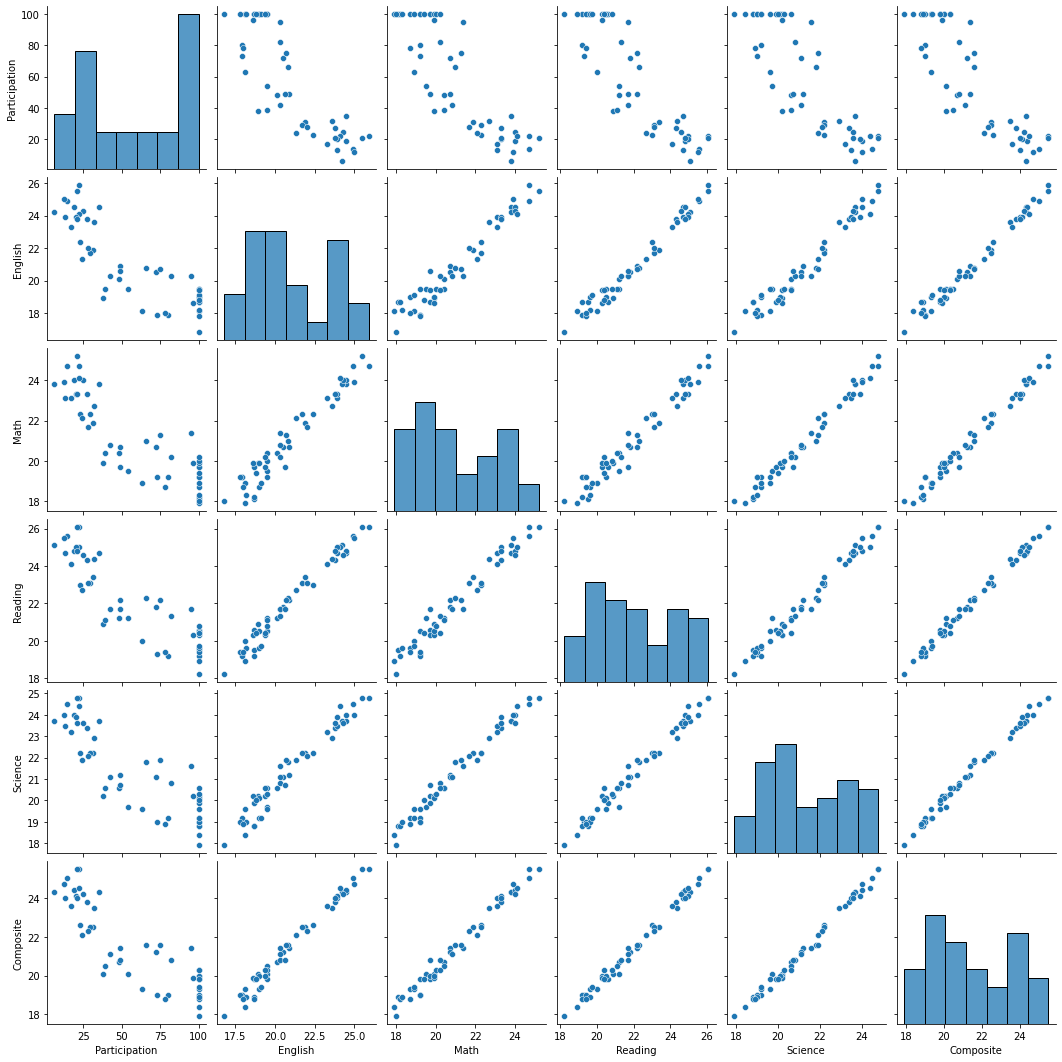

In [114]:
plt.figure(figsize=(10, 10))
sns.pairplot(act_2019_new)

plt.show();

## Step 3: Combination of all pre-processed data in the all tidied data from 2017 - 2019

The data will be merge vertically, and according to the columns


In [116]:
display(act_2017.head())

display(act_2018_new.head())

display(act_2019_new.head())

,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,60,20.3,20.7,21.4,21.0,21.0,2017
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,2017
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,2017
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,2017
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,2017


,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,52.1,20.2,20.5,21.3,20.7,20.8,2018
1,Alabama,100.0,18.9,18.3,19.6,19.0,19.1,2018
2,Alaska,33.0,19.8,20.6,21.6,20.7,20.8,2018
3,Arizona,66.0,18.2,19.4,19.5,19.2,19.2,2018
4,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4,2018


,State,Participation,English,Math,Reading,Science,Composite,Year
0,National,48.4,20.1,20.4,21.2,20.6,20.7,2019
1,Alabama,100.0,18.7,18.1,19.5,18.8,18.9,2019
2,Alaska,38.0,18.9,19.9,20.9,20.2,20.1,2019
3,Arizona,73.0,17.9,19.2,19.3,19.0,19.0,2019
4,Arkansas,100.0,19.0,18.7,19.6,19.2,19.3,2019


In [117]:
act_all_v = pd.concat([act_2017, act_2018_new, act_2019_new], ignore_index=True)

In [118]:
# # Making a copy of the data
# act_all = act_2017

# # Doing a double merge of the data
# act_all = act_all.merge(act_2018_new, how="left", on="State").merge(
#     act_2019_new, how="left", on="State"
# )

# act_all.head()

In [119]:
# convert the dataframe to csv

# act_all.to_csv("act_all_combined.csv",index=False)

In [120]:
# display(act_all.describe())
# display(act_all.info())


display(act_all_v.describe())
display(act_all_v.tail())

,Participation,English,Math,Reading,Science,Composite
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,61.695513,20.939103,21.112179,22.014744,21.362179,21.480769
std,33.183800,2.405413,2.009954,2.131478,1.840033,2.079209
min,6.000000,16.300000,17.800000,18.000000,17.900000,17.700000
25%,29.000000,19.000000,19.400000,20.400000,19.900000,19.800000
50%,65.500000,20.300000,20.700000,21.700000,21.100000,21.150000
75%,100.000000,23.425000,23.100000,24.200000,23.200000,23.600000
max,100.000000,26.000000,25.300000,26.100000,24.900000,25.600000


,State,Participation,English,Math,Reading,Science,Composite,Year
151,Virginia,21.0,23.8,23.3,24.8,23.6,24.0,2019
152,Washington,24.0,21.3,22.1,22.7,21.9,22.1,2019
153,West Virginia,49.0,20.6,19.7,21.7,20.7,20.8,2019
154,Wisconsin,100.0,19.4,20.2,20.4,20.6,20.3,2019
155,Wyoming,100.0,18.8,19.4,20.4,20.0,19.8,2019


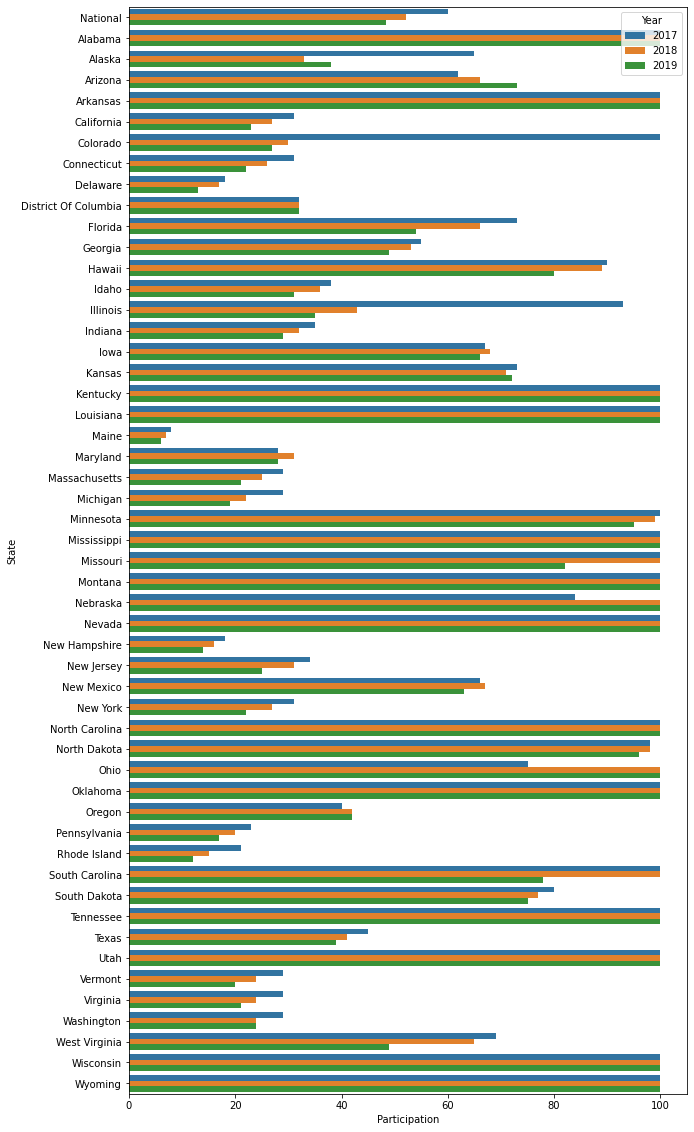

In [121]:
plt.figure(figsize=(10, 20))

sns.barplot(data=act_all_v, y="State", x="Participation", hue="Year")

plt.show()

## Step 4: Data Pre-processing of SAT Data


To put what SAT data stands for

### Step 4.1: Data Pre-Processing of sat_2017 data

#### Reading of the SAT files


In [154]:
#  Opening of related data files

# act files
sat_2017 = pd.read_csv("data/sat_2017.csv")

Exploring of sat 2017 data

In [155]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [156]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


Checking for NaN values

In [157]:
sat_2017.isnull().sum().sort_values().reset_index()
# No null values found

,index,0
0,State,0
1,Participation,0
2,Evidence-Based Reading and Writing,0
3,Math,0
4,Total,0


Changing of State to title case and Checking for duplicates

In [158]:
# Reformating the state to a titlecase
sat_2017["State"] = sat_2017["State"].str.title()

# Checking of duplicates in state
# Using the 'State' as the unique values
sat_2017.loc[sat_2017["State"].duplicated() == True]
# No duplicates found

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [159]:
# Reformatting of the object in 'Participation" into a float percentage
sat_2017["Participation"] = sat_2017["Participation"].str.rstrip("%").astype("int")

In [160]:
print(len(act_2017["State"]))  # 52 rows
print(len(sat_2017["State"]))  # 52 rows

52
51


In [161]:
# Using a for loop to loop every state to check which state is missing in SAT_2018
for state in act_2017["State"].values:
    if state not in sat_2017["State"].values:
        print(state)

# Found that the 'National' state is not in the sat 2017 data

National


In [162]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int32 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 1.9+ KB


General visulization of the sat 2017 data

<Figure size 720x720 with 0 Axes>

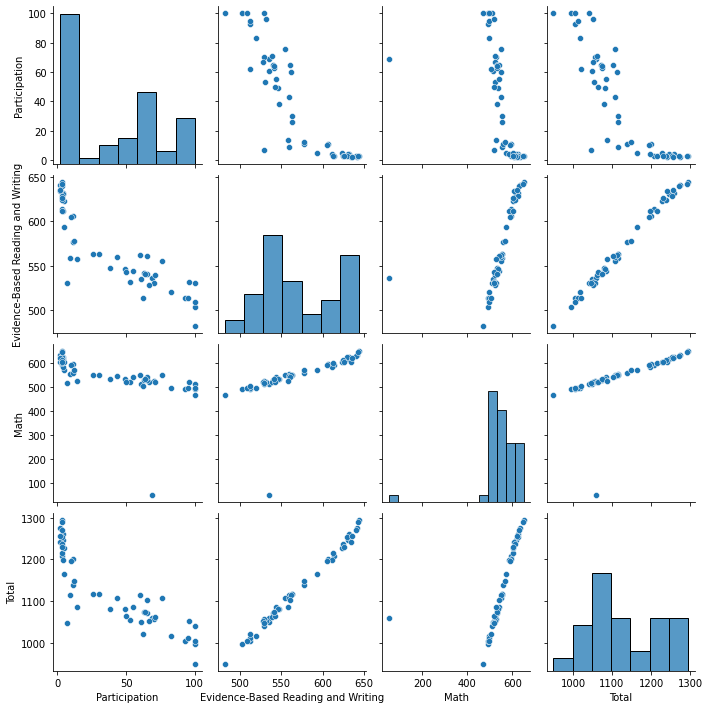

In [163]:
plt.figure(figsize=(10, 10))
sns.pairplot(sat_2017)

plt.show()

# Found a low score at Math

In [164]:
# Finding out what is that low score in Math
sat_2017.groupby("Math")["State"].min().reset_index().head()

,Math,State
0,52,Maryland
1,468,District Of Columbia
2,492,Delaware
3,493,Idaho
4,495,Michigan


In [165]:
# Reformatting of the data to determine the correct value of Math for Maryland
sat_2017[sat_2017["State"] == "Maryland"]

sat_2017.loc[sat_2017["State"] == "Maryland", "Math"] = (
    sat_2017[sat_2017["State"] == "Maryland"]["Total"]
    - sat_2017[sat_2017["State"] == "Maryland"]["Evidence-Based Reading and Writing"]
)

sat_2017[sat_2017["State"] == "Maryland"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69,536,524,1060


In [167]:
# Creation of new row with 'National' data
new_row = pd.DataFrame(
    data=[
        [
            "National",
            np.round(sat_2017["Participation"].mean()),
            np.round(sat_2017["Evidence-Based Reading and Writing"].mean()),
            np.round(sat_2017["Math"].mean()),
            np.round(sat_2017["Total"].mean()),
        ]
    ],
    columns=[
        "State",
        "Participation",
        "Evidence-Based Reading and Writing",
        "Math",
        "Total",
    ],
)

# Addition of 'National" data row into the top row of 2018 data
sat_2017 = pd.concat([new_row, sat_2017], axis=0, ignore_index=True)

sat_2017[sat_2017["State"] == "National"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,National,40.0,569.0,557.0,1126.0


In [168]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               52 non-null     object 
 1   Participation                       52 non-null     float64
 2   Evidence-Based Reading and Writing  52 non-null     float64
 3   Math                                52 non-null     float64
 4   Total                               52 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


In [174]:
# sns.pairplot(sat_2017)

### Data Pre-Processing of sat_2018 data